In [1]:
from bs4 import BeautifulSoup
from shapely.geometry import Polygon

import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
images = []
files = [
    './batch1.xml', 
    './batch2.xml', 
    './batch3.xml', 
    './batch4.xml'
]
for file in files:
    with open(file, 'r') as f:
        soup = BeautifulSoup(f.read(), "xml")
        for img in soup.find_all('image'):
            water_hyacinths = 0

            height = int(img.get('height'))
            width = int(img.get('width'))
            mask = np.zeros((height, width), np.uint8)

            for polygon in img.find_all('polygon'):
                coords = np.array([[[float(n) for n in p.split(',')] for p in polygon.get('points').split(';')]]).astype(np.int32)
                
                if(polygon.get('label') == 'river'):
                    mask = cv2.fillPoly(mask, coords, color=1)
                    
            for polygon in img.find_all('polygon'):
                coords = np.array([[[float(n) for n in p.split(',')] for p in polygon.get('points').split(';')]]).astype(np.int32)
            
                if(polygon.get('label') == 'object'):
                    
                    
                    if(polygon.find('attribute').text == 'water hyacinth'):
                        mask = cv2.fillPoly(mask, coords, color=1)
                    elif(polygon.find('attribute').text == 'garbage'):
                        mask = cv2.fillPoly(mask, coords, color=1)
                    elif(polygon.find('attribute').text == 'boat'):
                        mask = cv2.fillPoly(mask, coords, color=0)
                    elif(polygon.find('attribute').text == 'others'):
                        mask = cv2.fillPoly(mask, coords, color=0)
            
            print(img.get('name'))
            
            images.append({
                'name': img.get('name'),
                'mask': mask
            })

098a1d68568bc.jpg
0bcf8ec7197b6.jpg
10b9ed1b6f7a1.jpg
1488a698e63bd.jpg
154f0cb77c45e.jpg
190d822be2cb3.jpg
1951d7cdd8244.jpg
1c037dd4d2086.jpg
1eb0743881e5f.jpg
1ec7b254bdaaf.jpg
21fe40768c508.jpg
2cfe833db7ea7.jpg
2d43805e5efd4.jpg
3417fd5df4e56.jpg
35bab86ba2f51.jpg
393cc1c742e64.jpg
3bd773645a357.jpg
3c00c792e62bd.jpg
3cc34eb391885.jpg
3cee913a8e627.jpg
3d7f2507794b7.jpg
3dabfae71c167.jpg
3f92dcb11d28.jpg
40f18819e05cb.jpg
46ef3fc7b5b8e.jpg
4803f57676483.jpg
4b2867b35553d.jpg
52bb900d76657.jpg
53241f797dc08.jpg
58ae22740e60c.jpg
597505188abfe.jpg
5b95e2880d3c3.jpg
5fd8fea046d5a.jpg
607221f3fcc7f.jpg
621ede2509ce8.jpg
6438d9a3a0bf9.jpg
654be90a139c2.jpg
72994804521ec.jpg
73578938be63.jpg
735af3d3d78cb.jpg
76cfdc98fccc4.jpg
77d6f33aabf4e.jpg
7ab404394bb36.jpg
81083d3658d1e.jpg
84bf16be2e4ae.jpg
873b3c3db7f43.jpg
8750fecf323d7.jpg
892b92278853d.jpg
8b08d1e3aaf1b.jpg
91224c7d7f796.jpg
952eff0fe0f6a.jpg
9af65325b6362.jpg
9bf6f91534b8f.jpg
9e9b4e4d952b8.jpg
a29cc20df16b2.jpg
a45229c7ea87

In [3]:
for im in images:
    print(im['name'])
    cv2.imwrite('./masks/%s' % im['name'], im['mask'])

098a1d68568bc.jpg
0bcf8ec7197b6.jpg
10b9ed1b6f7a1.jpg
1488a698e63bd.jpg
154f0cb77c45e.jpg
190d822be2cb3.jpg
1951d7cdd8244.jpg
1c037dd4d2086.jpg
1eb0743881e5f.jpg
1ec7b254bdaaf.jpg
21fe40768c508.jpg
2cfe833db7ea7.jpg
2d43805e5efd4.jpg
3417fd5df4e56.jpg
35bab86ba2f51.jpg
393cc1c742e64.jpg
3bd773645a357.jpg
3c00c792e62bd.jpg
3cc34eb391885.jpg
3cee913a8e627.jpg
3d7f2507794b7.jpg
3dabfae71c167.jpg
3f92dcb11d28.jpg
40f18819e05cb.jpg
46ef3fc7b5b8e.jpg
4803f57676483.jpg
4b2867b35553d.jpg
52bb900d76657.jpg
53241f797dc08.jpg
58ae22740e60c.jpg
597505188abfe.jpg
5b95e2880d3c3.jpg
5fd8fea046d5a.jpg
607221f3fcc7f.jpg
621ede2509ce8.jpg
6438d9a3a0bf9.jpg
654be90a139c2.jpg
72994804521ec.jpg
73578938be63.jpg
735af3d3d78cb.jpg
76cfdc98fccc4.jpg
77d6f33aabf4e.jpg
7ab404394bb36.jpg
81083d3658d1e.jpg
84bf16be2e4ae.jpg
873b3c3db7f43.jpg
8750fecf323d7.jpg
892b92278853d.jpg
8b08d1e3aaf1b.jpg
91224c7d7f796.jpg
952eff0fe0f6a.jpg
9af65325b6362.jpg
9bf6f91534b8f.jpg
9e9b4e4d952b8.jpg
a29cc20df16b2.jpg
a45229c7ea87

In [8]:
img = cv2.imread('./masks/098a1d68568bc.jpg', cv2.IMREAD_GRAYSCALE)
img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [9]:
img[img==2] = 1

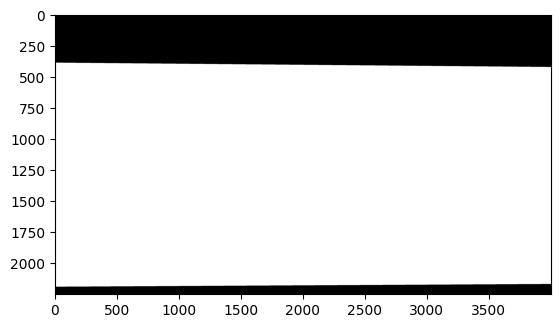

In [10]:
plt.imshow(img, cmap='gray')